 # Iterative numerical solution of the optimization problem
 

$\min_{w \in R^{2}}\left\{F(w) = w_{1}w_{2}e^{-w_{1}^{2}-w_{2}^2}\right\}$

[ 4.19309661e-09 -1.48634240e-08]
3.6590432586762866e-05
8


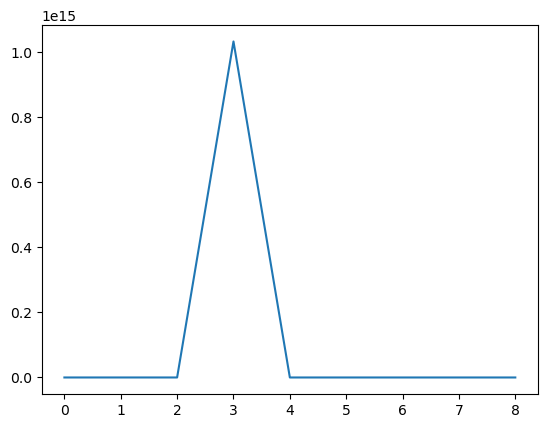

In [1]:
import numpy as np
import numpy.linalg as la
import scipy.optimize as sopt
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d



def myFun(w):
    return w[0]*w[1]*np.exp(-w[0]**2-w[1]**2)*(w[0]*w[1]) + 1000*(w[0]**2 + w[1]**2)

def gradFun(w):
    return np.array([-2*w[0]*w[1]*np.exp(-w[0]**2-w[1]**2)-2*np.exp(-w[0]**2-w[1]**2)*(w[0]**2)*w[1] + 2000*w[0], \
                     np.exp(-w[0]**2-w[1]**2)*w[0]-2*np.exp(-w[0]**2-w[1]**2)*(w[1]**2)*w[0]]  + 2000*w[1])

#def oneDFun(alpha):
#    return myFun(x + alpha*dk)


iterate = np.array([-1, -1])  #initial iterate
historyIter = [iterate]
historyFun=[myFun(iterate)]
maxIter=1000
tol=0.0001
k=0



N = len(iterate)

I = np.eye(N, dtype=int) # Identity matrix I of size NxN.
Bk = I   # Set the first iteration matrix for BFGS


grad=gradFun(iterate)


while  (la.norm(gradFun(iterate)) > tol) and (k <= maxIter):
#for i in range(maxIter):
     b = -gradFun(iterate)    
     dk = np.linalg.solve(Bk,b)  # determine the search direction
        
     #dk = -Bk*gradFun(iterate)  # when using the DFP update in QN Method
     ################ constant step length 
     next_iterate = iterate + dk  # constant alpha
     ################ Exact line search
     #alpha=0.01
     # exactAlpha = sopt.golden(oneDFun)   #  needs import scipy.optimize as sopt
     #exactAlpha = sopt.golden(oneDFun)   #  optimal alpha
     #next_iterate = iterate + exactAlpha*dk # updates the iterate
     
     ######## BFGS rank-2 matrix update  ##############
     sk = next_iterate - iterate
     yk = gradFun(next_iterate)-gradFun(iterate) 
        
     r0 = 1.0 / (np.dot(yk, sk))
     A1 = r0*np.outer(yk,yk)
     vk = sk.dot(Bk)
     r1 = 1.0/(np.dot(sk,vk))
     A2 = r1*np.outer(vk,vk)    
     # Matrix update
     Bk = Bk + A1 - A2 
     
     ############# List for Plotting function values ###########  
     historyIter.append(next_iterate)
     funValue=myFun(next_iterate)
     historyFun.append(funValue)
     ######## update iteration counter and the new iterate
     k=k+1
     iterate=next_iterate
        
       


############# after the termination of the algorithm #############
print(iterate)
grad=gradFun(iterate)
print(la.norm(grad))
print(k) # number of iteration until termination

functionValues = np. array(historyFun)
functionValues = functionValues.flatten()
n=len(functionValues)

x=range(n)
pt.plot(x, historyFun)